In [1]:
using OperatorApproximation

### Scalar Equation

Consider the eigenvalue problem
$$
    - \phi''(x) + \cos(2x) \phi(x) = \lambda \phi(x).
$$

In [2]:
P = 1; μ = 0.1;
gd = PeriodicMappedInterval(-P*pi,P*pi)
sp = Fourier(gd)
D = FloquetDerivative(μ)
M = Multiplication(x -> cos(2x))
Λ = eigen((-D^2 + M)*sp,100)
Λ.values[1:10]

10-element Vector{Union{Float64, ComplexF64}}:
 -0.1217655449410364
  0.4706543549338054
  1.466766842516023
  3.9791892157513615
  4.100900595560546
  9.01371983892043
  9.017606927797544
 16.00831045970947
 16.008364622723004
 25.00520901029379

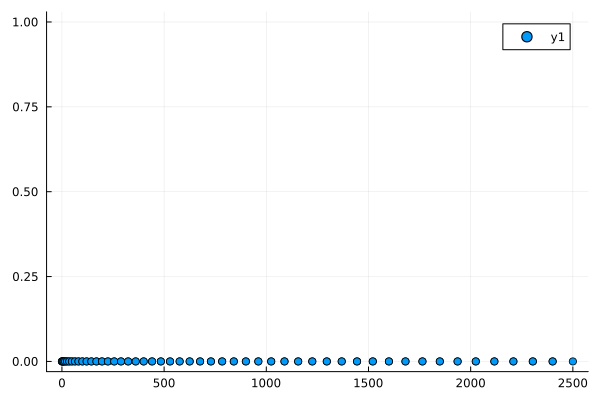

In [3]:
ploteval(Λ)

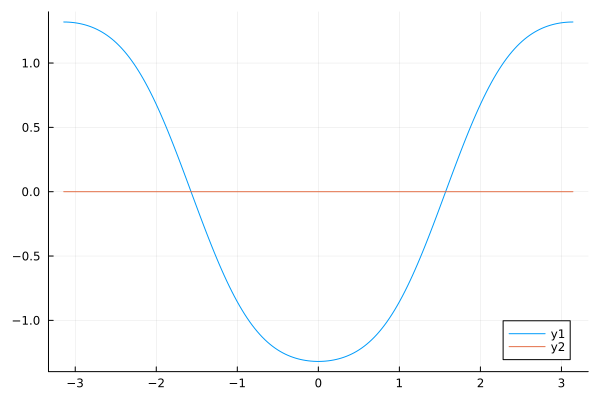

In [4]:
plot(Λ.functions[3])

### Systems of equations

Now consider the system

\begin{align*}
- \phi''(x) + \cos(2x) \phi(x) &+ \psi'(x) &= \lambda \phi(x),\\
\phi'(x) & - \psi''(x) + \sin(2x) \psi(x) &= \lambda \psi(x).
\end{align*}

In [5]:
P = 1; μ = 0.1;
gd = PeriodicMappedInterval(-P*pi,P*pi)
sp = Fourier(gd)
D = FloquetDerivative(μ)
M1 = Multiplication(x -> cos(2x))
M2 = Multiplication(x -> sin(2x))
Op = ((-D^2 + M1) ⊞ D) ⊘ ( D ⊞ (-D^2 + M2))
Λ = eigen(Op*(sp ⊕ sp),200)
Λ.values[1:10]

10-element Vector{Union{Float64, ComplexF64}}:
 -0.09961443655746659 - 0.1093809094465984im
 -0.09961443655741471 + 0.1093809094464697im
   0.6090953430251319 - 0.9419422709017632im
   0.6090953430251631 + 0.9419422709017934im
   1.3364228822013593 + 0.9434042516950774im
   1.3364228822013817 - 0.9434042516950845im
    4.017266406085259 - 2.063846656649512im
    4.017266406085641 + 2.063846656649602im
    4.045398847971139 + 1.8837020109231357im
    4.045398847971431 - 1.8837020109230556im

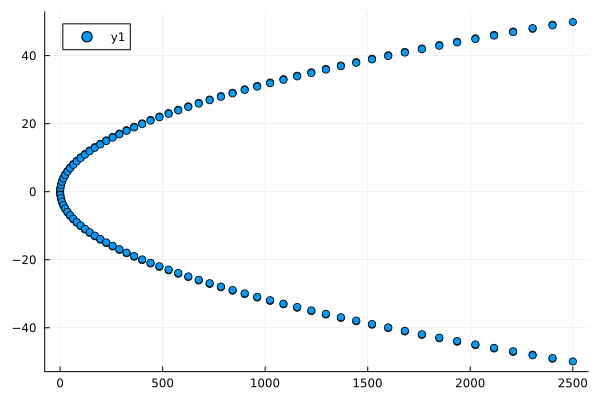

In [6]:
ploteval(Λ)

Plot the two eigenfunctions associated with an eigenvalue

In [7]:
Λ.values[3]

0.6090953430251319 - 0.9419422709017632im

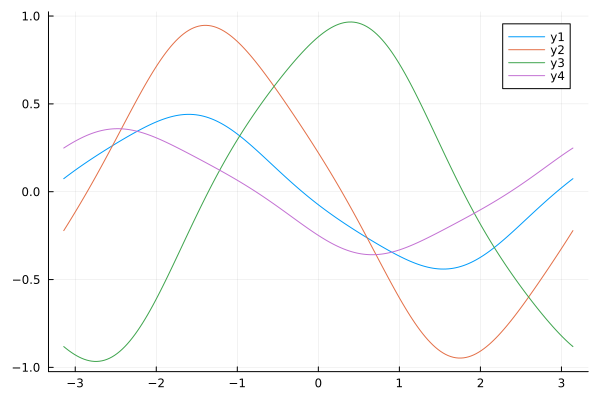

In [8]:
u, v = Λ.functions[3];
plot(u)  # real and imaginary parts
plot!(v)